In [3]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import configparser

# paths
config = configparser.ConfigParser()
config.read("ConfigFile.ini")
pf = config['PATHS']['datasets']
pf = os.path.join(pf,"test_data/CSFselection/{selection}h_*.0.nc")


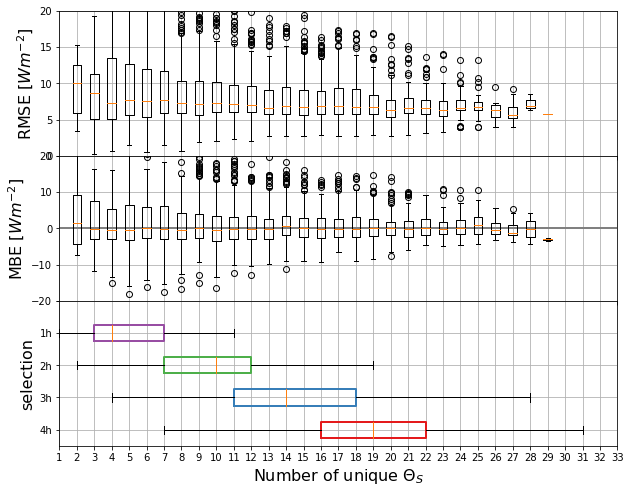

In [6]:

fig=plt.figure(figsize=(10,8))
axs = fig.subplots(3,1)

colors = ['#e41a1c',
          '#377eb8',
          '#4daf4a',
          '#984ea3']

for s,selection in enumerate([4,3,2,1]):
    mu0s = np.array([])
    for fn in glob.glob(pf.format(selection=selection)):

        ds = xr.open_dataset(fn)
        if len(ds.MBE.values)==0:
            continue
        ds = ds.rename_dims({'MBE':'N',
                            'RMSE':'N',
                            'mu0N':'N',
                            'mu0max':'N',
                            'mu0min':'N'})
        mu0s = np.concatenate((mu0s,ds.mu0N.values),axis=0)

        if s==0:
            rmse=[]
            mbe=[]
            for i in range(0,35):
                ds_sel = ds.where(ds.mu0N==i,drop=True)
                rmse.append(list(ds_sel.RMSE.values))
                mbe.append(list(ds_sel.MBE.values))
        else:
            for i in range(0,35):
                ds_sel = ds.where(ds.mu0N==i,drop=True)
                rmse[i] = rmse[i] + list(ds_sel.RMSE.values)
                mbe[i] = mbe[i] + list(ds_sel.MBE.values)

    axs[2].boxplot([mu0s],vert=False,widths=0.5,showfliers=False,showmeans=False,positions=[s],
                   boxprops={'color':colors[s],'linewidth':2})           
axs[0].boxplot(rmse)
axs[0].set_xlim(1,33)
axs[0].set_ylim(0,20)
axs[0].grid()
axs[0].set_xticks(np.arange(1,34))
axs[0].set_xticklabels([]*33)
axs[0].set_ylabel(r'RMSE $\left[Wm^{-2}\right]$',fontsize=16)


axs[1].plot([0,35],[0,0],color=(0.5,0.5,0.5),linewidth=2)
axs[1].boxplot(mbe)
axs[1].set_xlim(1,33)
axs[1].set_xticklabels([]*33)
axs[1].set_ylim(-20,20)
axs[1].grid()
axs[1].set_ylabel(r'MBE $\left[Wm^{-2}\right]$',fontsize=16)


axs[2].set_xlim(1,33)
axs[2].set_yticks(np.arange(0,5))
axs[2].set_yticklabels(['4h','3h','2h','1h',''])
axs[2].set_xticks(np.arange(1,34))
axs[2].grid()
axs[2].set_ylabel('selection',fontsize=16)
axs[2].set_xlabel(r'Number of unique $\Theta_S$',fontsize=16)

plt.subplots_adjust(hspace=0,wspace=0)
plt.savefig("figures/showcase_CSF_selection.png",dpi=300)

In [ ]:
fig=plt.figure(figsize=(10,8))
axs = fig.subplots(3,1)

colors = ['#e41a1c',
          '#377eb8',
          '#4daf4a',
          '#984ea3']

for s,selection in enumerate([4,3,2,1]):
    mu0s = np.array([])
    for fn in glob.glob(pf.format(selection=selection)):

        ds = xr.open_dataset(fn)
        if len(ds.MBE.values)==0:
            continue
        ds = ds.rename_dims({'MBE':'N',
                            'RMSE':'N',
                            'mu0N':'N',
                            'mu0max':'N',
                            'mu0min':'N'})
        dmu0 = np.round(ds.mu0min.values-ds.mu0max.values,0)
        mu0s = np.concatenate((mu0s,dmu0),axis=0)

        if s==0:
            rmse=[]
            mbe=[]
            for i in range(0,60):
                ds_sel = ds.where((ds.mu0min-ds.mu0max).round(0)==i,drop=True)
                rmse.append(list(ds_sel.RMSE.values))
                mbe.append(list(ds_sel.MBE.values))
        else:
            for i in range(0,60):
                ds_sel = ds.where((ds.mu0min-ds.mu0max).round(0)==i,drop=True)
                rmse[i] = rmse[i] + list(ds_sel.RMSE.values)
                mbe[i] = mbe[i] + list(ds_sel.MBE.values)

    axs[2].boxplot([mu0s],vert=False,widths=0.5,showfliers=False,showmeans=False,positions=[s],
                   boxprops={'color':colors[s],'linewidth':2})           
axs[0].boxplot(rmse)
axs[0].set_xlim(1,60)
axs[0].set_ylim(0,20)
axs[0].grid()
axs[0].set_xticks(np.arange(1,61))
axs[0].set_xticklabels([]*60)
axs[0].set_ylabel(r'RMSE $\left[Wm^{-2}\right]$',fontsize=16)


axs[1].plot([0,35],[0,0],color=(0.5,0.5,0.5),linewidth=2)
axs[1].boxplot(mbe)
axs[1].set_xlim(1,60)
axs[1].set_xticklabels([]*60)
axs[1].set_ylim(-20,20)
axs[1].grid()
axs[1].set_ylabel(r'MBE $\left[Wm^{-2}\right]$',fontsize=16)


axs[2].set_xlim(1,33)
axs[2].set_yticks(np.arange(0,5))
axs[2].set_yticklabels(['4h','3h','2h','1h',''])
axs[2].set_xticks(np.arange(1,34))
axs[2].grid()
axs[2].set_ylabel('selection',fontsize=16)
axs[2].set_xlabel(r'$\Theta_S$ range [$^\circ$]',fontsize=16)

plt.subplots_adjust(hspace=0,wspace=0)
plt.savefig("figures/showcase_CSF_selection2.png",dpi=300)

In [14]:
ds

<xarray.Dataset>
Dimensions:  (N: 1)
Coordinates:
    MBE      (N) float64 0.375
    RMSE     (N) float64 4.658
    mu0N     (N) int64 5
    mu0max   (N) float64 71.59
    mu0min   (N) float64 82.12
Dimensions without coordinates: N
Data variables:
    *empty*

In [12]:
(ds.mu0min-ds.mu0max).round(0)

<xarray.DataArray (N: 1)>
array([11.])
Coordinates:
    MBE      (N) float64 0.375
    RMSE     (N) float64 4.658
    mu0N     (N) int64 5
    mu0max   (N) float64 71.59
    mu0min   (N) float64 82.12
Dimensions without coordinates: N